# Explore here

Load & Inspect

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# 1. Full missing value analysis
missing_percent = data.isnull().sum() / len(data) * 100
print("Columns with missing values:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

# 2. Identify the 2 categorical columns
object_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(object_cols.tolist())

# 3. Show sample of categorical values
if len(object_cols) > 0:
    print("\nSample values:")
    for col in object_cols:
        print(f"{col}: {data[col].unique()[:5]}")

# 4. Basic stats for non-numeric columns
print("\nNon-numeric column summary:")
print(data.describe(include=['object']))

Columns with missing values:
Series([], dtype: float64)

Categorical columns:
['COUNTY_NAME', 'STATE_NAME']

Sample values:
COUNTY_NAME: ['Autauga' 'Baldwin' 'Barbour' 'Bibb' 'Blount']
STATE_NAME: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California']

Non-numeric column summary:
       COUNTY_NAME STATE_NAME
count         3140       3140
unique        1841         51
top     Washington      Texas
freq            31        254


We are going to drop :
-flips (federal information processing standards) it is a numeric code for counties
-COUNTY_NAME
-STATE_NAME
These are categorical, there are 1841 unique counties and 51 unique states, the cardinality is too high and they are not sociodemographic factors 

In [ ]:
# STEP 1: LOAD AND CLEAN DATA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Drop location identifiers (not sociodemographic factors)
data = data.drop(columns=['fips', 'COUNTY_NAME', 'STATE_NAME'])

# Verify new shape
print(f"New shape: {data.shape}")

New shape: (3140, 105)


print all columns

In [8]:
# Alternative: Display as scrollable DataFrame
from IPython.display import display

# Create a DataFrame of column names
column_df = pd.DataFrame({
    "Column Number": range(1, len(data.columns)+1),
    "Column Name": data.columns
})

display(column_df)

Column Number               Column Name
0                1                   TOT_POP
1                2                       0-9
2                3    0-9 y/o % of total pop
3                4                    19-Oct
4                5  10-19 y/o % of total pop
..             ...                       ...
100            101            CKD_prevalence
101            102          CKD_Lower 95% CI
102            103          CKD_Upper 95% CI
103            104                CKD_number
104            105          Urban_rural_code

[105 rows x 2 columns]

In [2]:
import pandas as pd

# Load the data
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Save columns to a text file - guaranteed to get all columns
with open("all_columns.txt", "w") as f:
    f.write("COMPLETE LIST OF 105 COLUMNS:\n")
    f.write("="*80 + "\n")
    for i, col in enumerate(data.columns, 1):
        f.write(f"{i:3}. {col}\n")
    f.write("\nTotal columns: " + str(len(data.columns)))

print("✅ All 105 columns saved to 'all_columns.txt' in your workspace")
print("Open this file in your Codespace to see the complete list")

✅ All 105 columns saved to 'all_columns.txt' in your workspace
Open this file in your Codespace to see the complete list


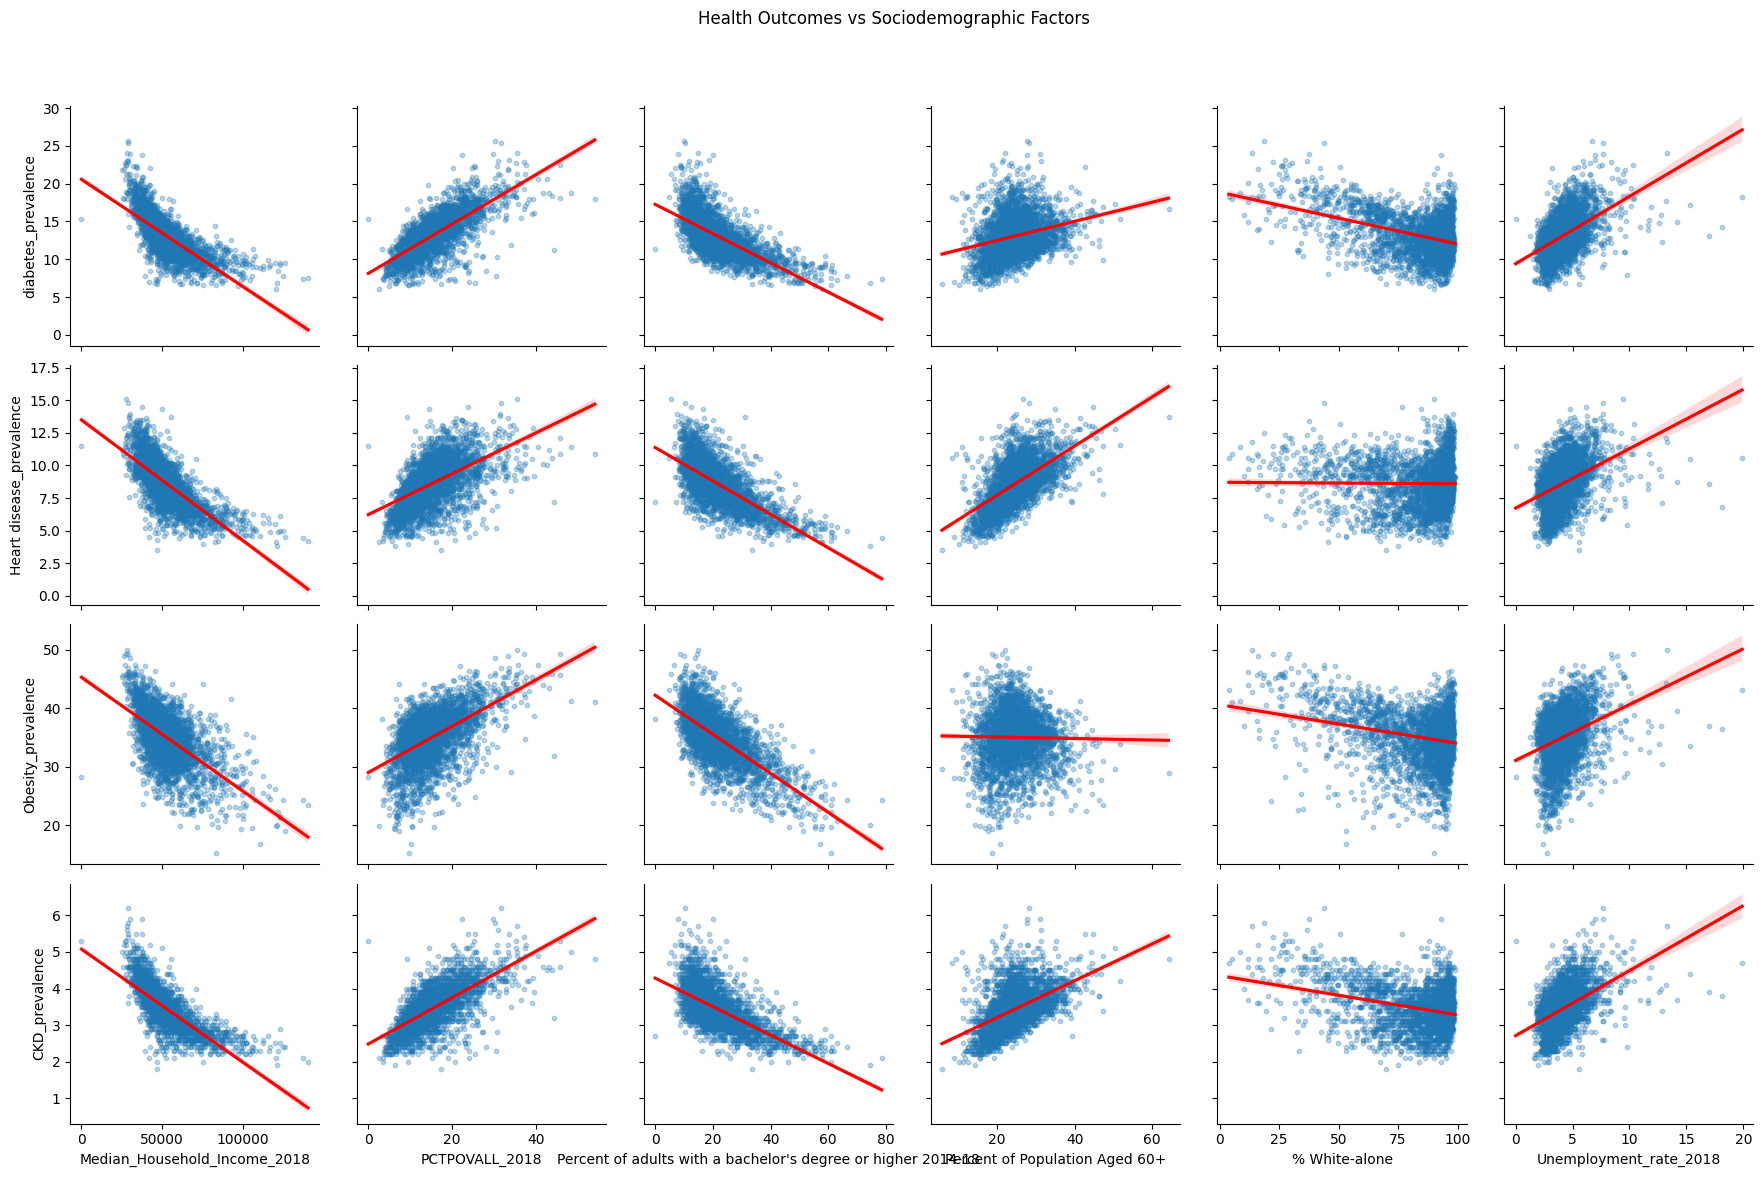

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Select key features
socio_demo_features = [
    'Median_Household_Income_2018',
    'PCTPOVALL_2018',  # Poverty rate
    "Percent of adults with a bachelor's degree or higher 2014-18",
    'Percent of Population Aged 60+',
    '% White-alone',
    'Unemployment_rate_2018'
]

health_outcomes = [
    'diabetes_prevalence',
    'Heart disease_prevalence',
    'Obesity_prevalence',
    'CKD_prevalence'
]

# Create pair grid
g = sns.PairGrid(data, x_vars=socio_demo_features, y_vars=health_outcomes, height=3)
g.map(sns.regplot, scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Health Outcomes vs Sociodemographic Factors')
plt.savefig('health_vs_socio_grid.png', bbox_inches='tight')
plt.show()

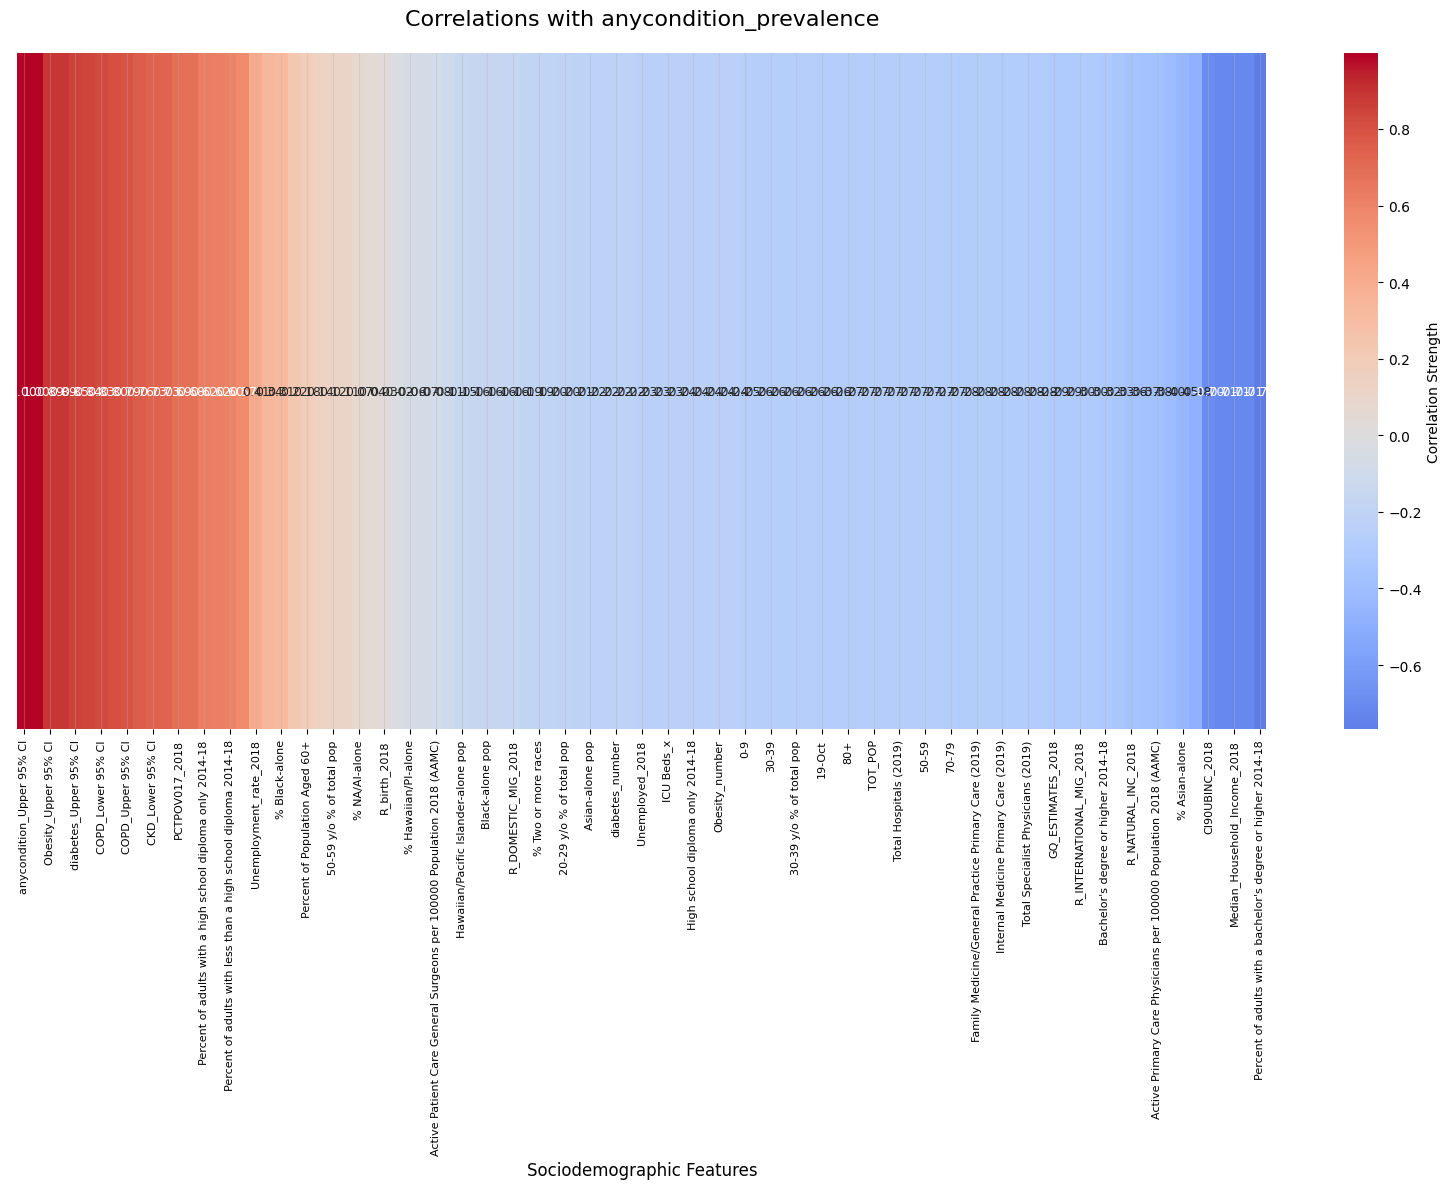

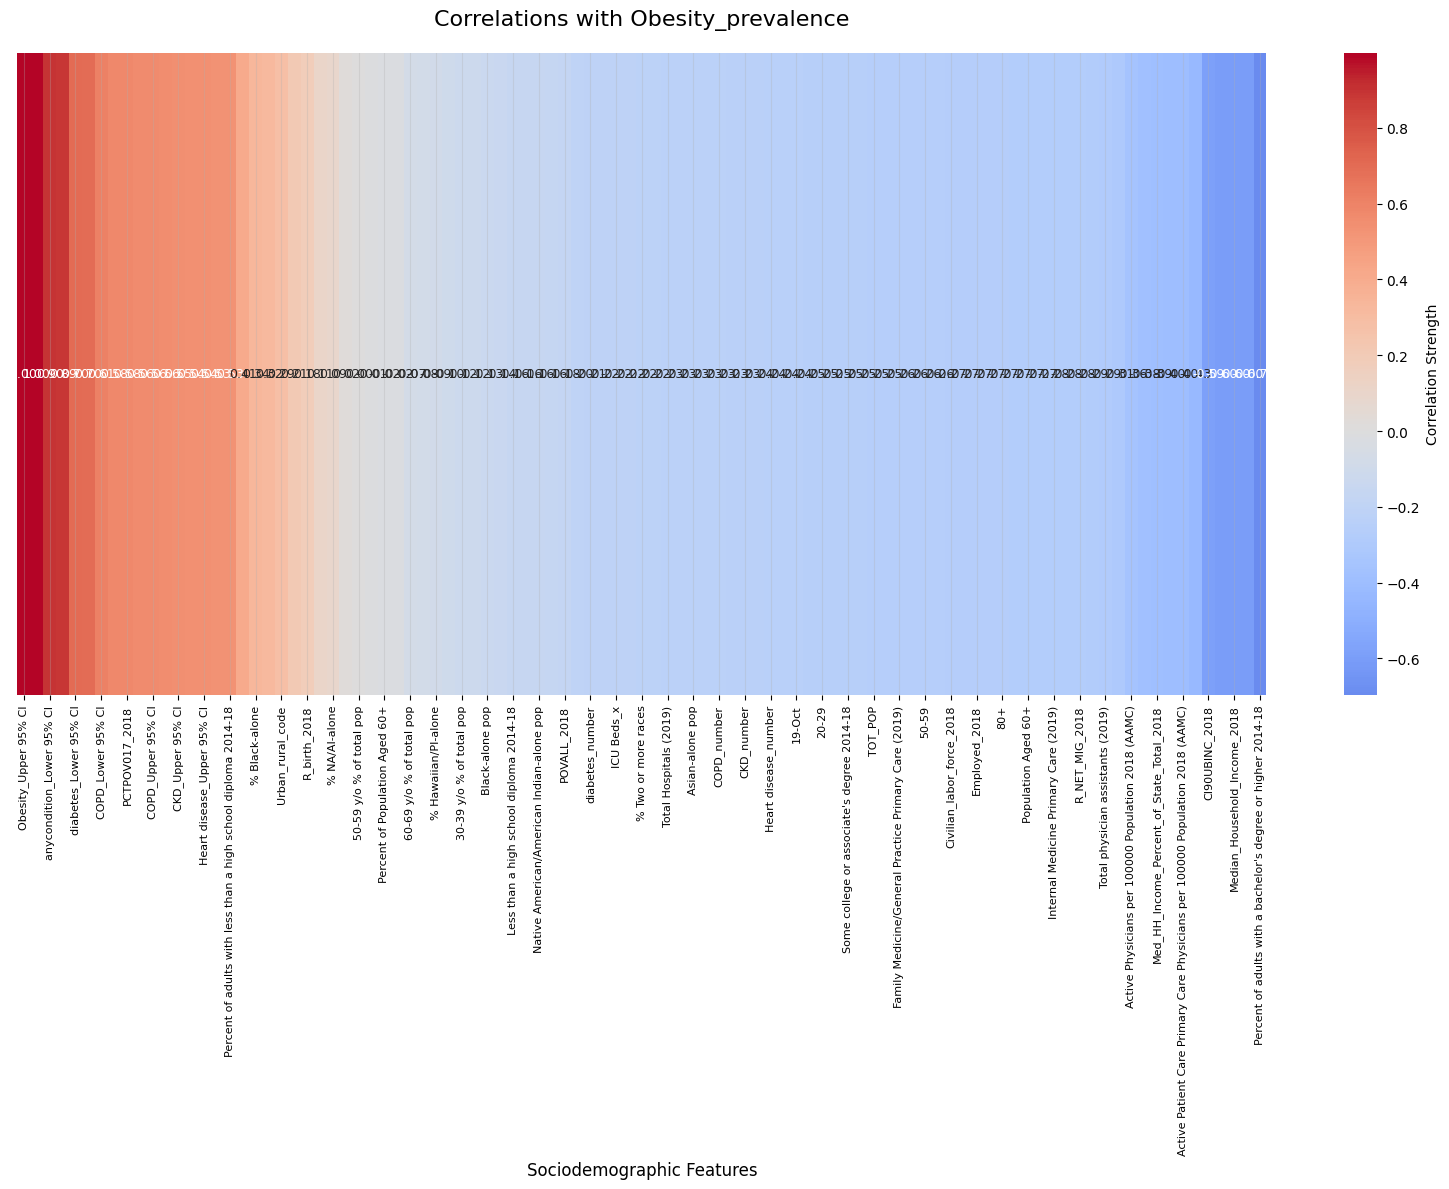

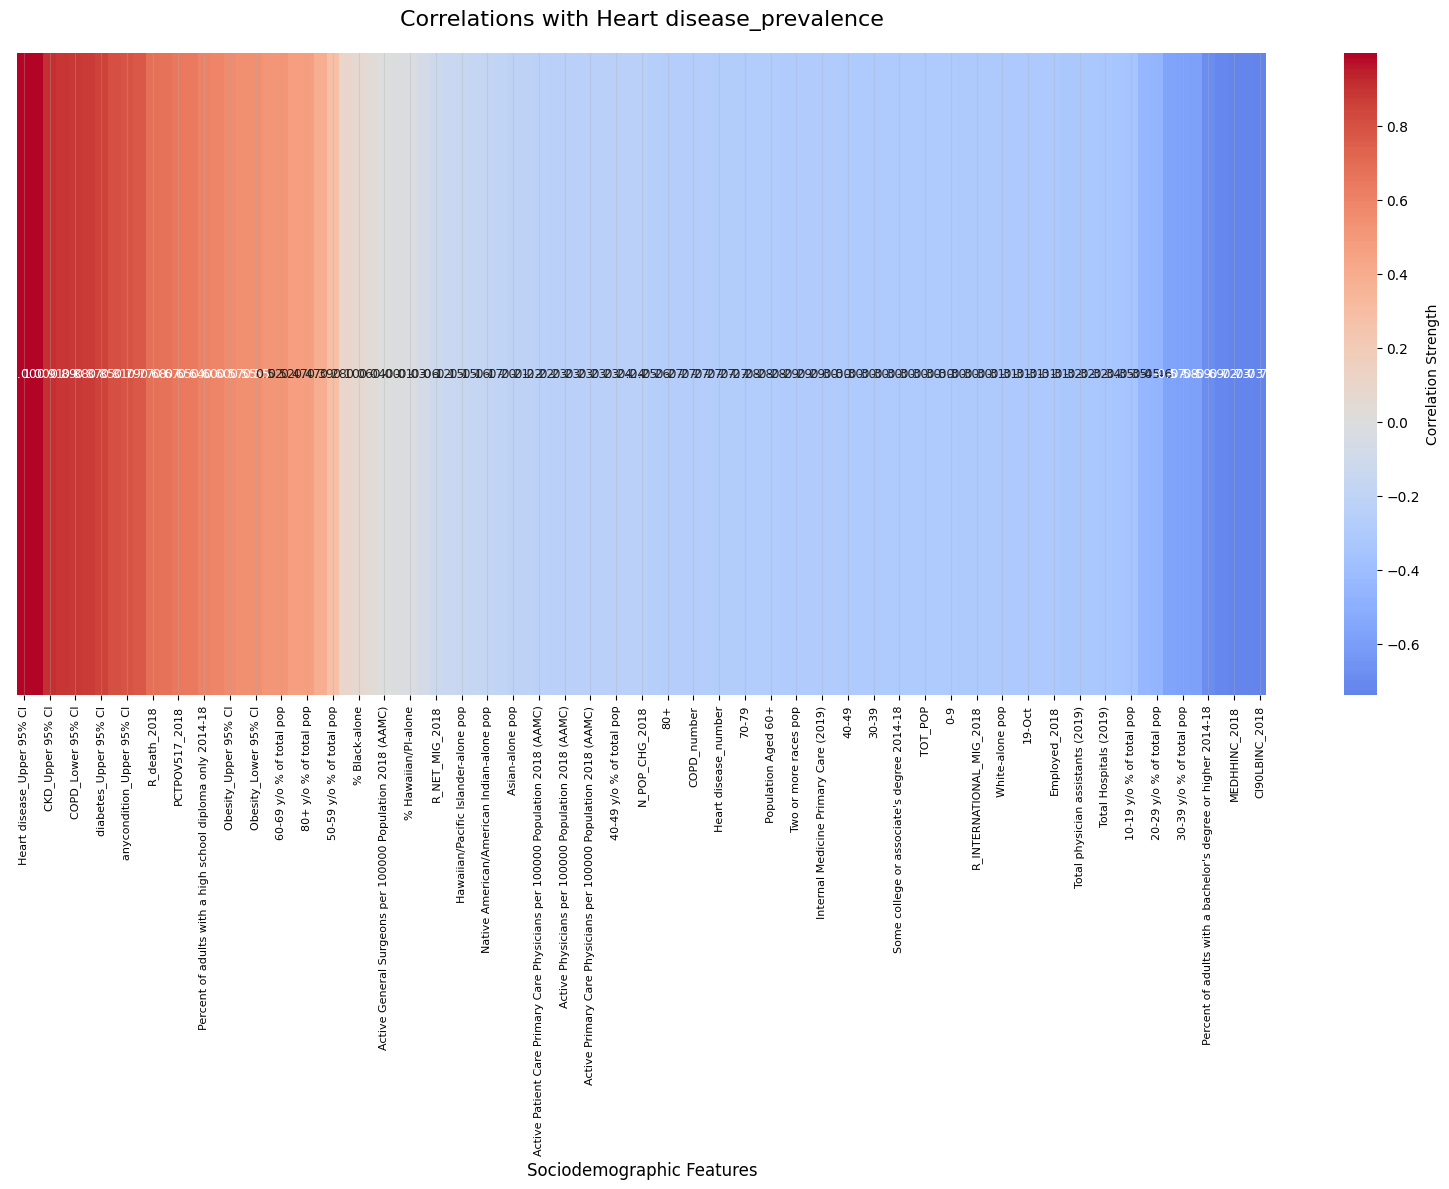

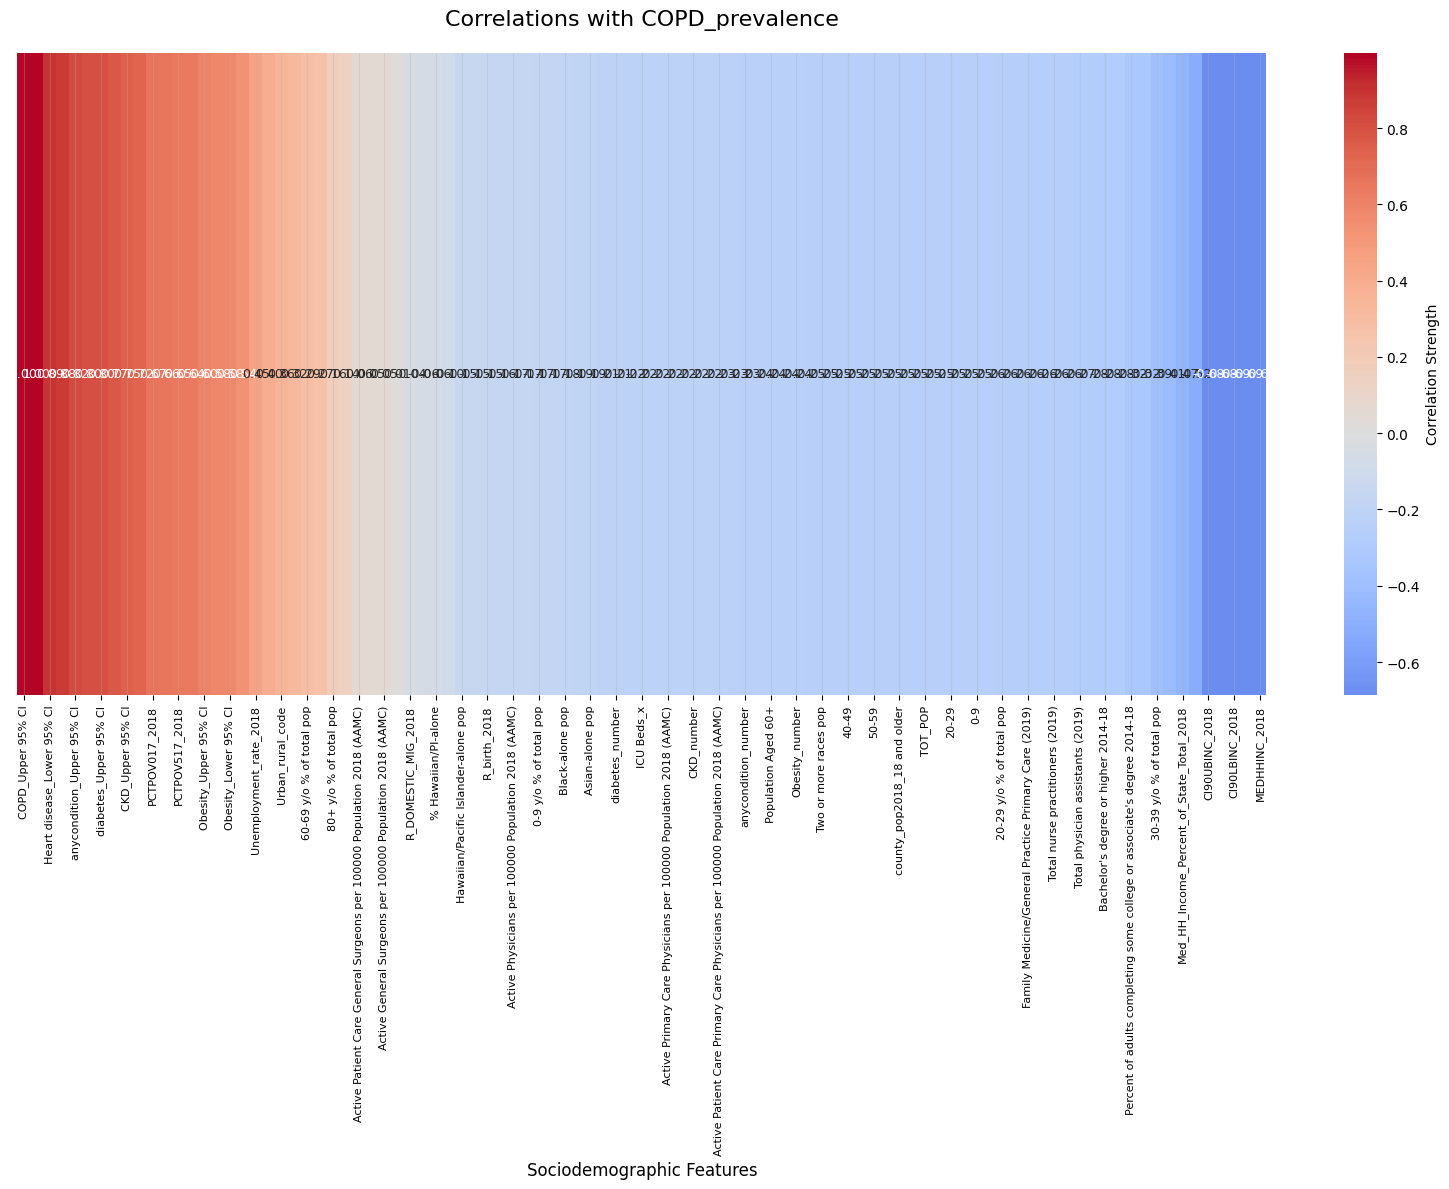

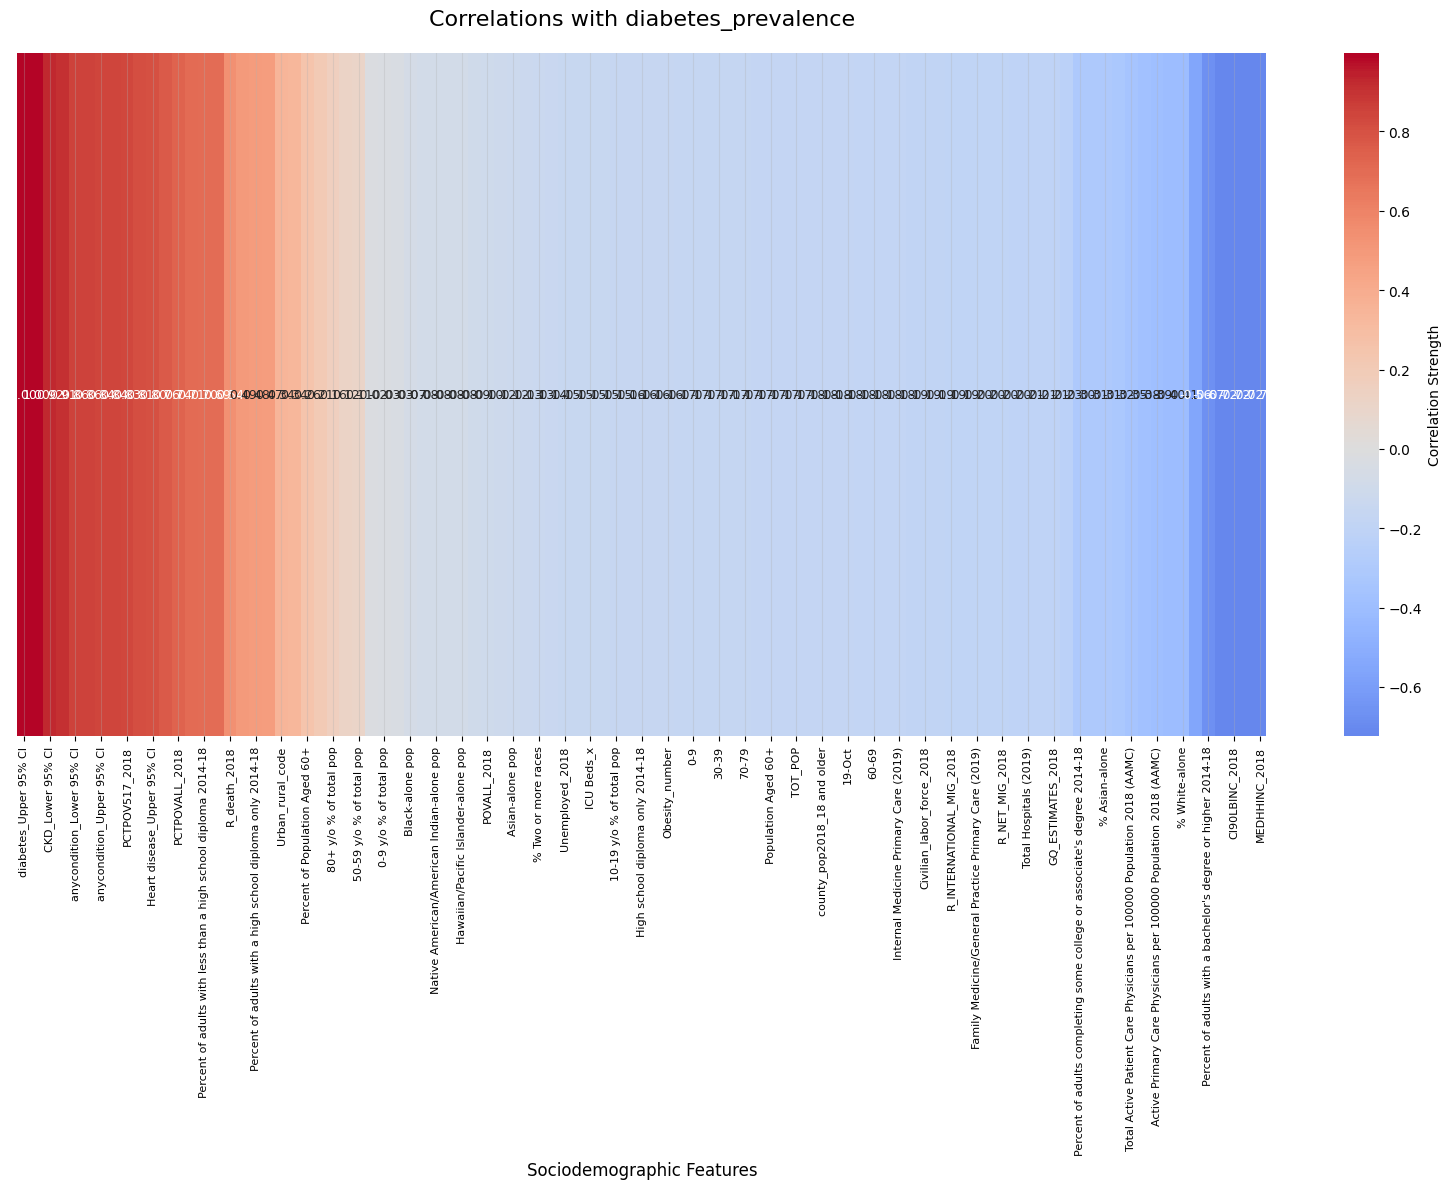

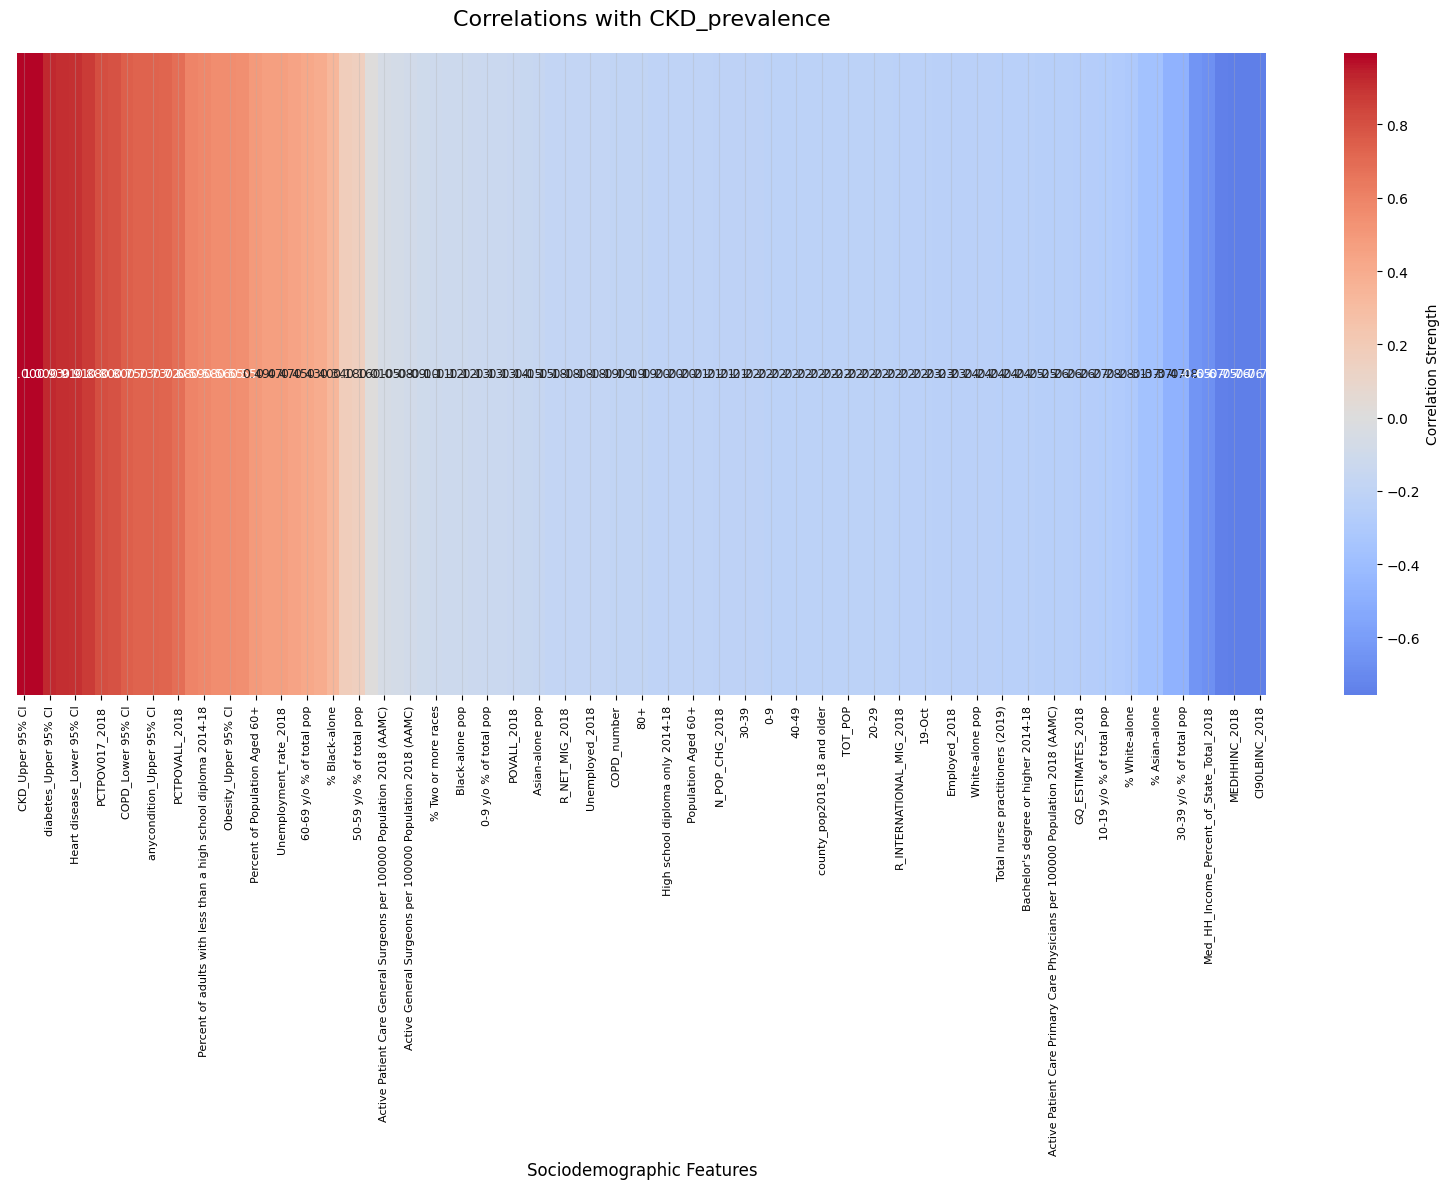

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Define health outcomes (targets)
health_targets = [
    'anycondition_prevalence',
    'Obesity_prevalence',
    'Heart disease_prevalence',
    'COPD_prevalence',
    'diabetes_prevalence',
    'CKD_prevalence'
]

# Get all sociodemographic features
all_columns = data.columns.tolist()
exclude = health_targets + ['fips', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS']
socio_demo_features = [col for col in all_columns if col not in exclude]

# Create 6 separate correlation heatmaps
for target in health_targets:
    # Calculate correlations for this health outcome
    correlations = data[socio_demo_features].apply(lambda x: x.corr(data[target]))
    
    # Create dataframe for plotting
    corr_df = pd.DataFrame({
        'Feature': socio_demo_features,
        'Correlation': correlations
    }).sort_values('Correlation', ascending=False)
    
    # Create heatmap
    plt.figure(figsize=(16, 12))
    heatmap = sns.heatmap(
        corr_df.set_index('Feature').T,  # Transpose to single row
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        annot_kws={"size": 9},
        cbar_kws={'label': 'Correlation Strength'}
    )
    
    # Improve readability
    plt.title(f'Correlations with {target}', fontsize=16, pad=20)
    plt.xlabel('Sociodemographic Features', fontsize=12)
    plt.yticks([])  # Remove y-axis label since we only have one target
    plt.xticks(rotation=90, fontsize=8)
    
    # Add horizontal grid lines
    plt.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

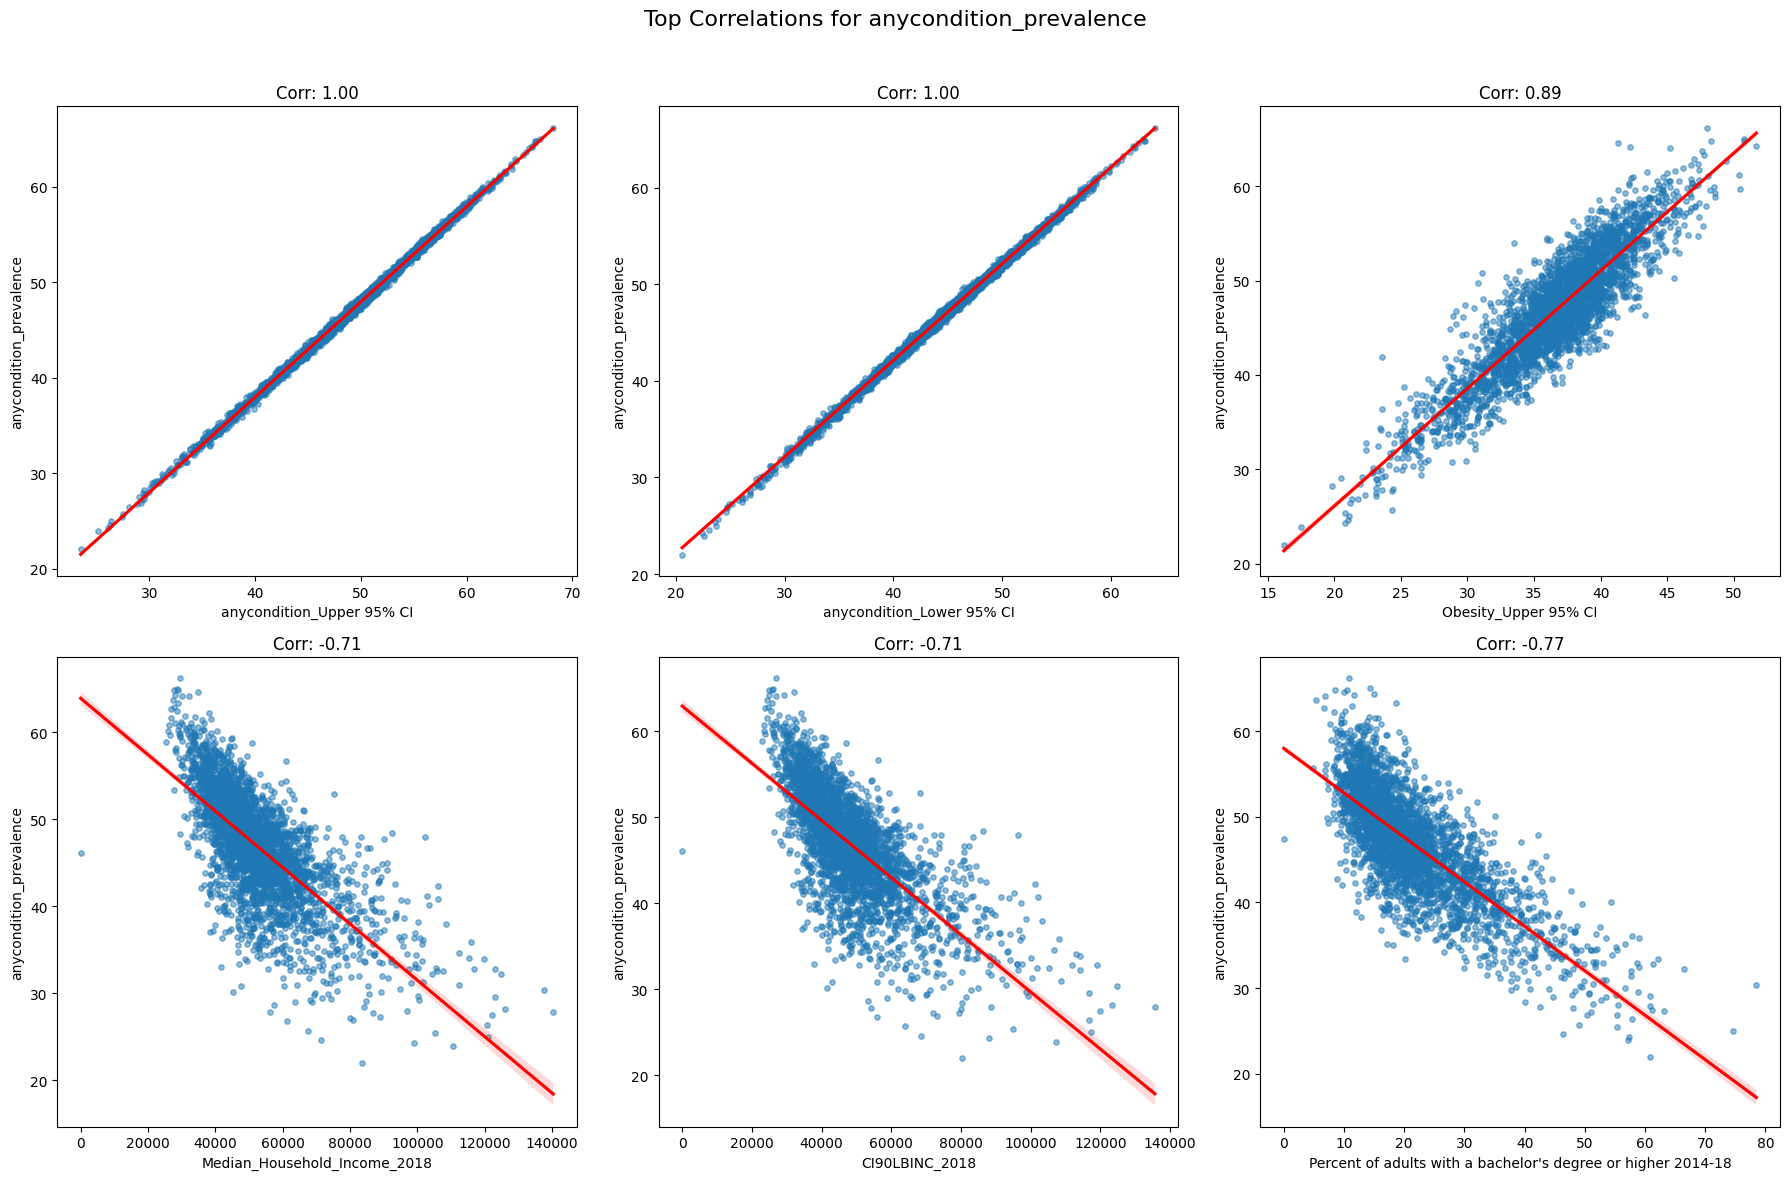


Top correlations for anycondition_prevalence:
++++++++++++++++++++++++++++++++++++++++++++++++++
Strongest positive correlations:
anycondition_Upper 95% CI    0.998812
anycondition_Lower 95% CI    0.998643
Obesity_Upper 95% CI         0.894357

Strongest negative correlations:
Median_Household_Income_2018                                   -0.706113
CI90LBINC_2018                                                 -0.708710
Percent of adults with a bachelor's degree or higher 2014-18   -0.768119





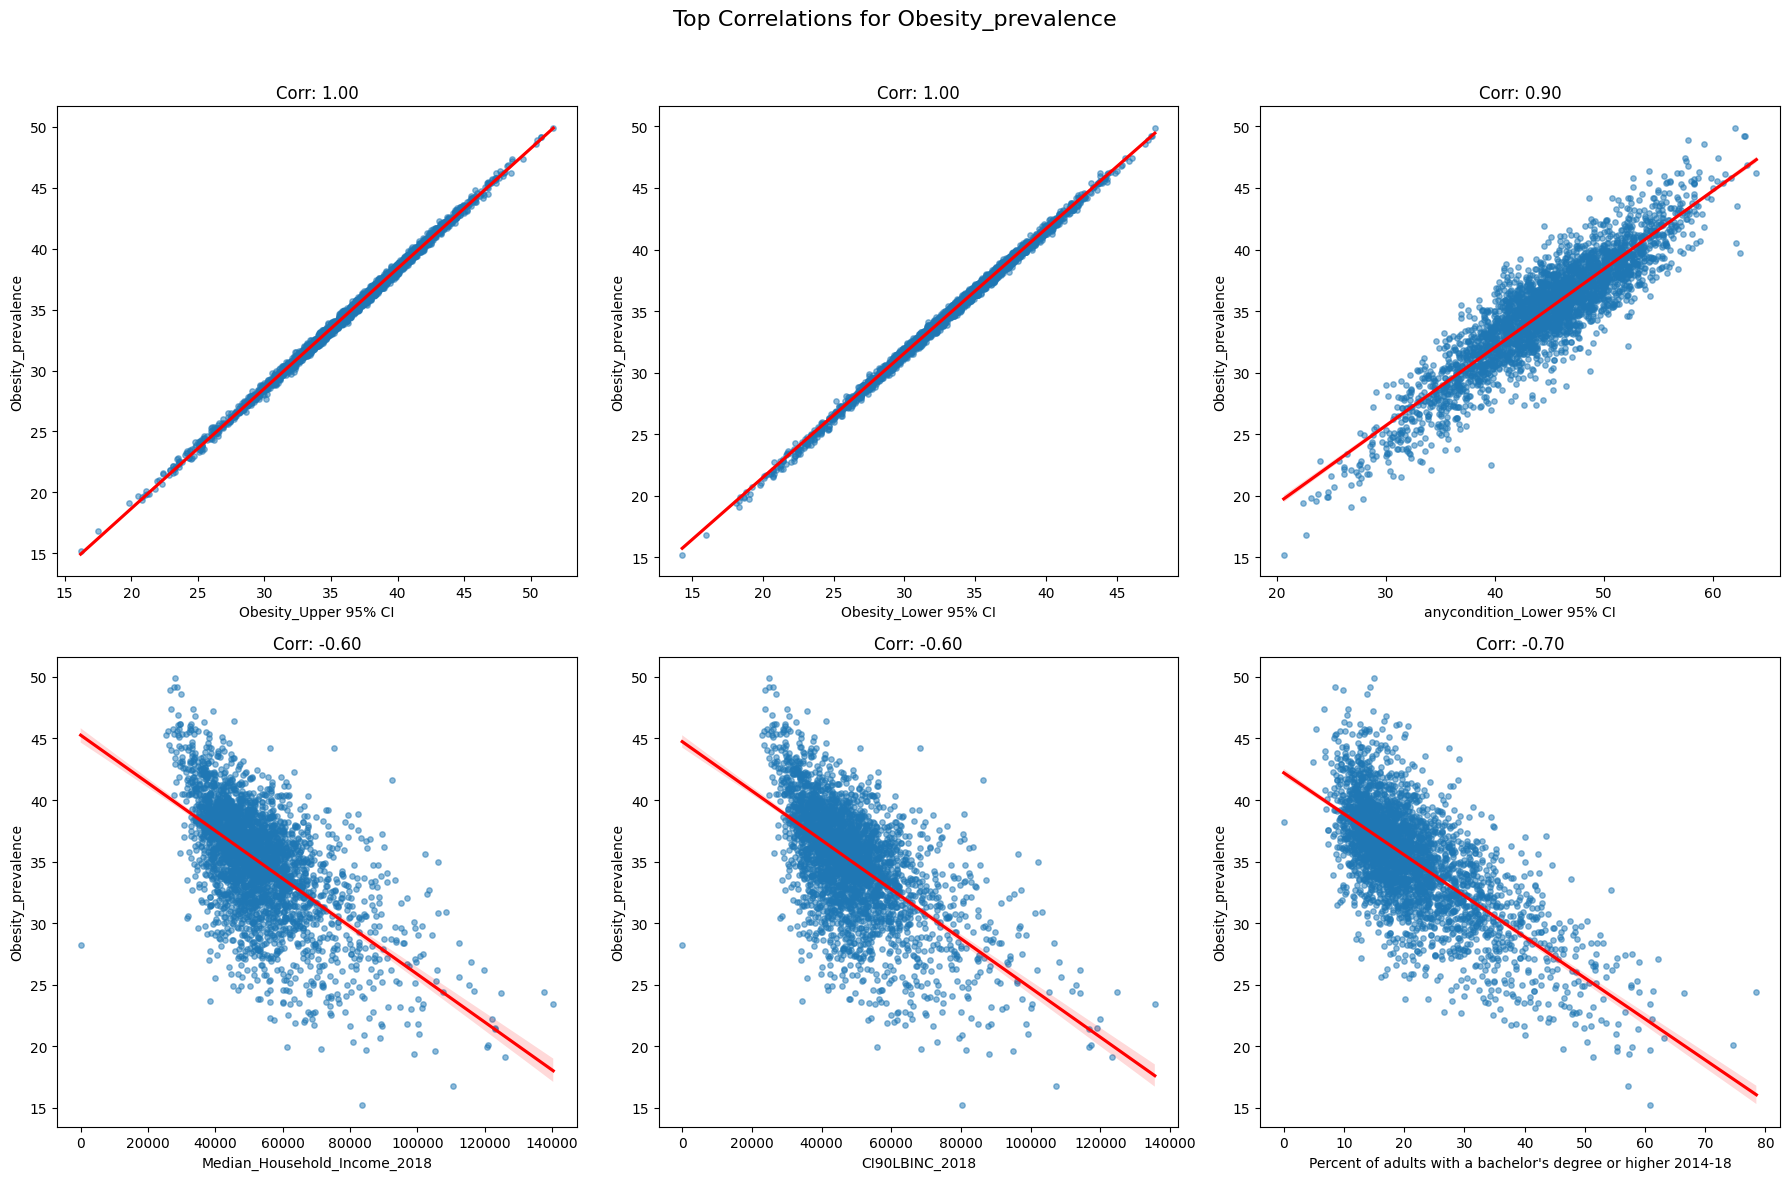


Top correlations for Obesity_prevalence:
++++++++++++++++++++++++++++++++++++++++++++++++++
Strongest positive correlations:
Obesity_Upper 95% CI         0.998239
Obesity_Lower 95% CI         0.998117
anycondition_Lower 95% CI    0.895747

Strongest negative correlations:
Median_Household_Income_2018                                   -0.598189
CI90LBINC_2018                                                 -0.602412
Percent of adults with a bachelor's degree or higher 2014-18   -0.696026





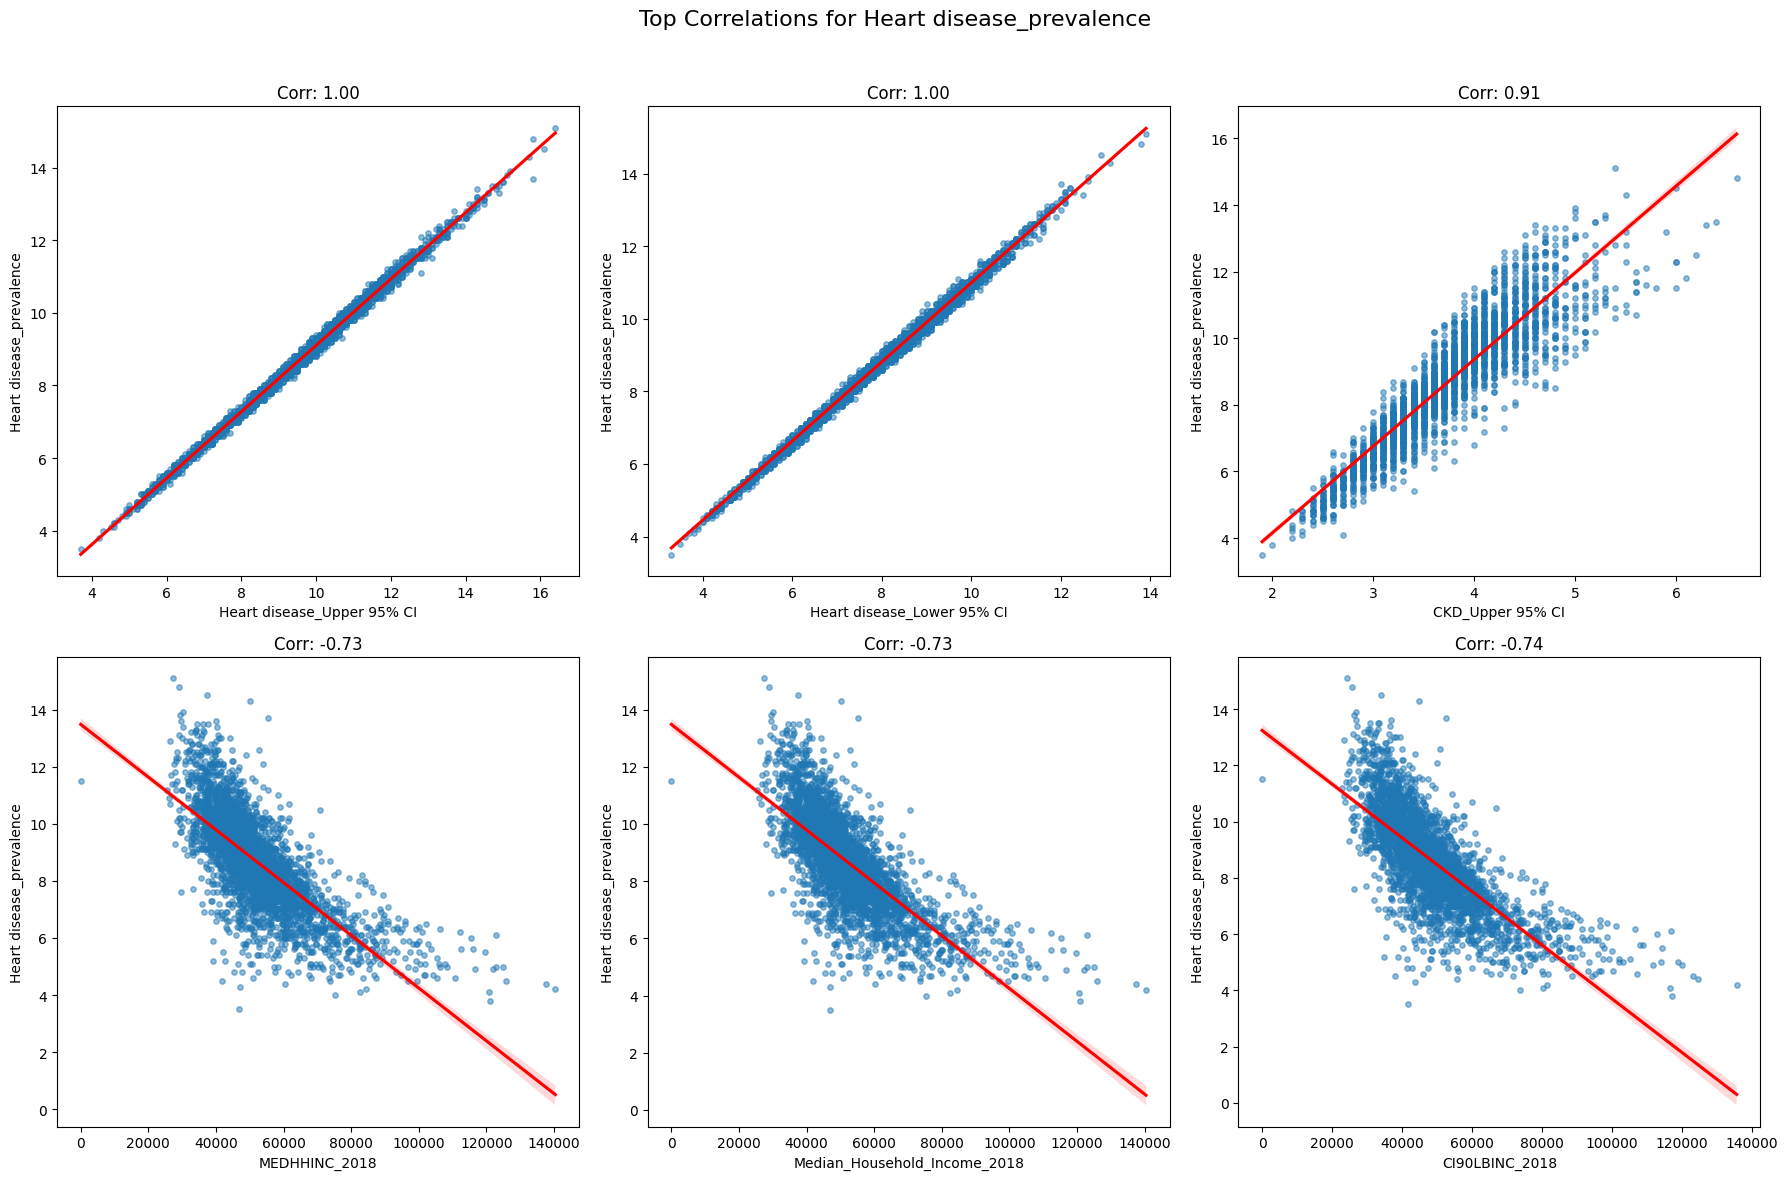


Top correlations for Heart disease_prevalence:
++++++++++++++++++++++++++++++++++++++++++++++++++
Strongest positive correlations:
Heart disease_Upper 95% CI    0.997752
Heart disease_Lower 95% CI    0.997441
CKD_Upper 95% CI              0.908082

Strongest negative correlations:
MEDHHINC_2018                  -0.730513
Median_Household_Income_2018   -0.730513
CI90LBINC_2018                 -0.737557





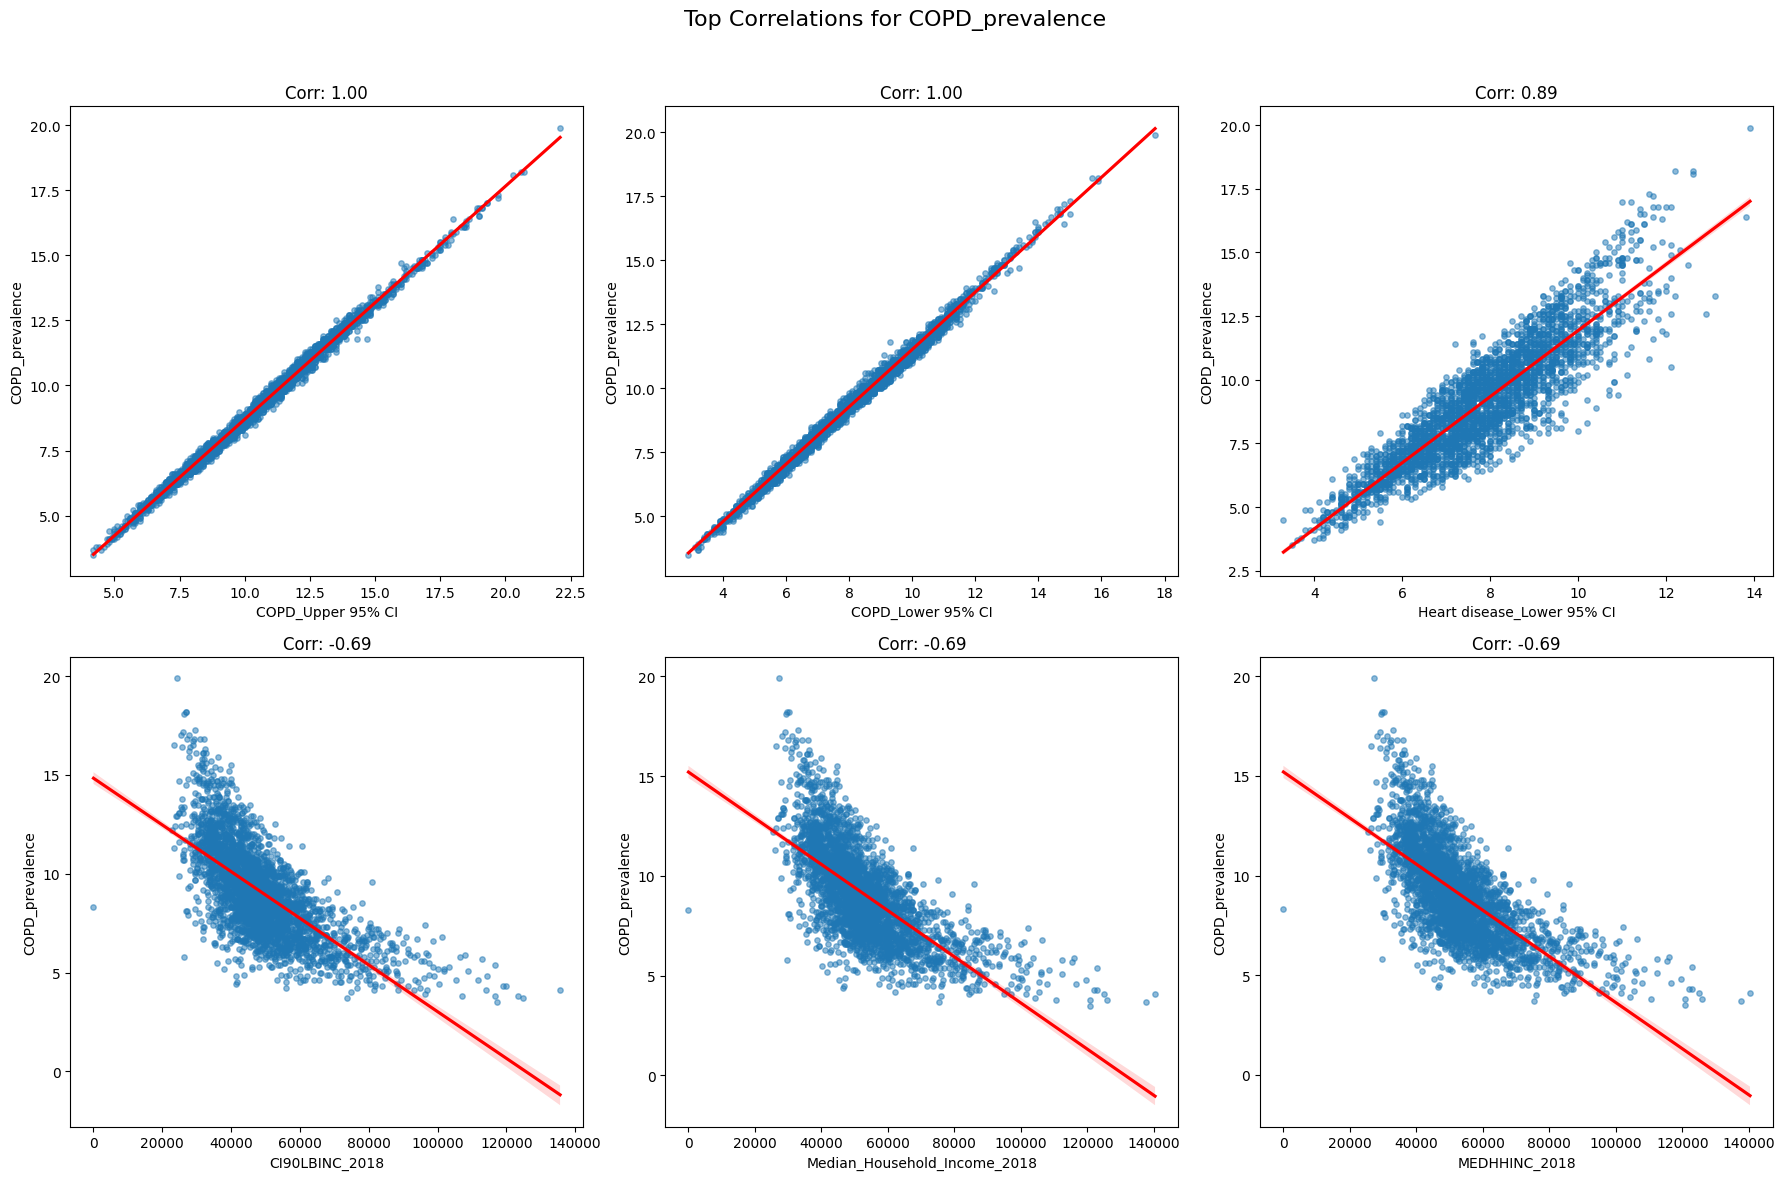


Top correlations for COPD_prevalence:
++++++++++++++++++++++++++++++++++++++++++++++++++
Strongest positive correlations:
COPD_Upper 95% CI             0.997249
COPD_Lower 95% CI             0.996601
Heart disease_Lower 95% CI    0.892144

Strongest negative correlations:
CI90LBINC_2018                 -0.685080
Median_Household_Income_2018   -0.685883
MEDHHINC_2018                  -0.685883





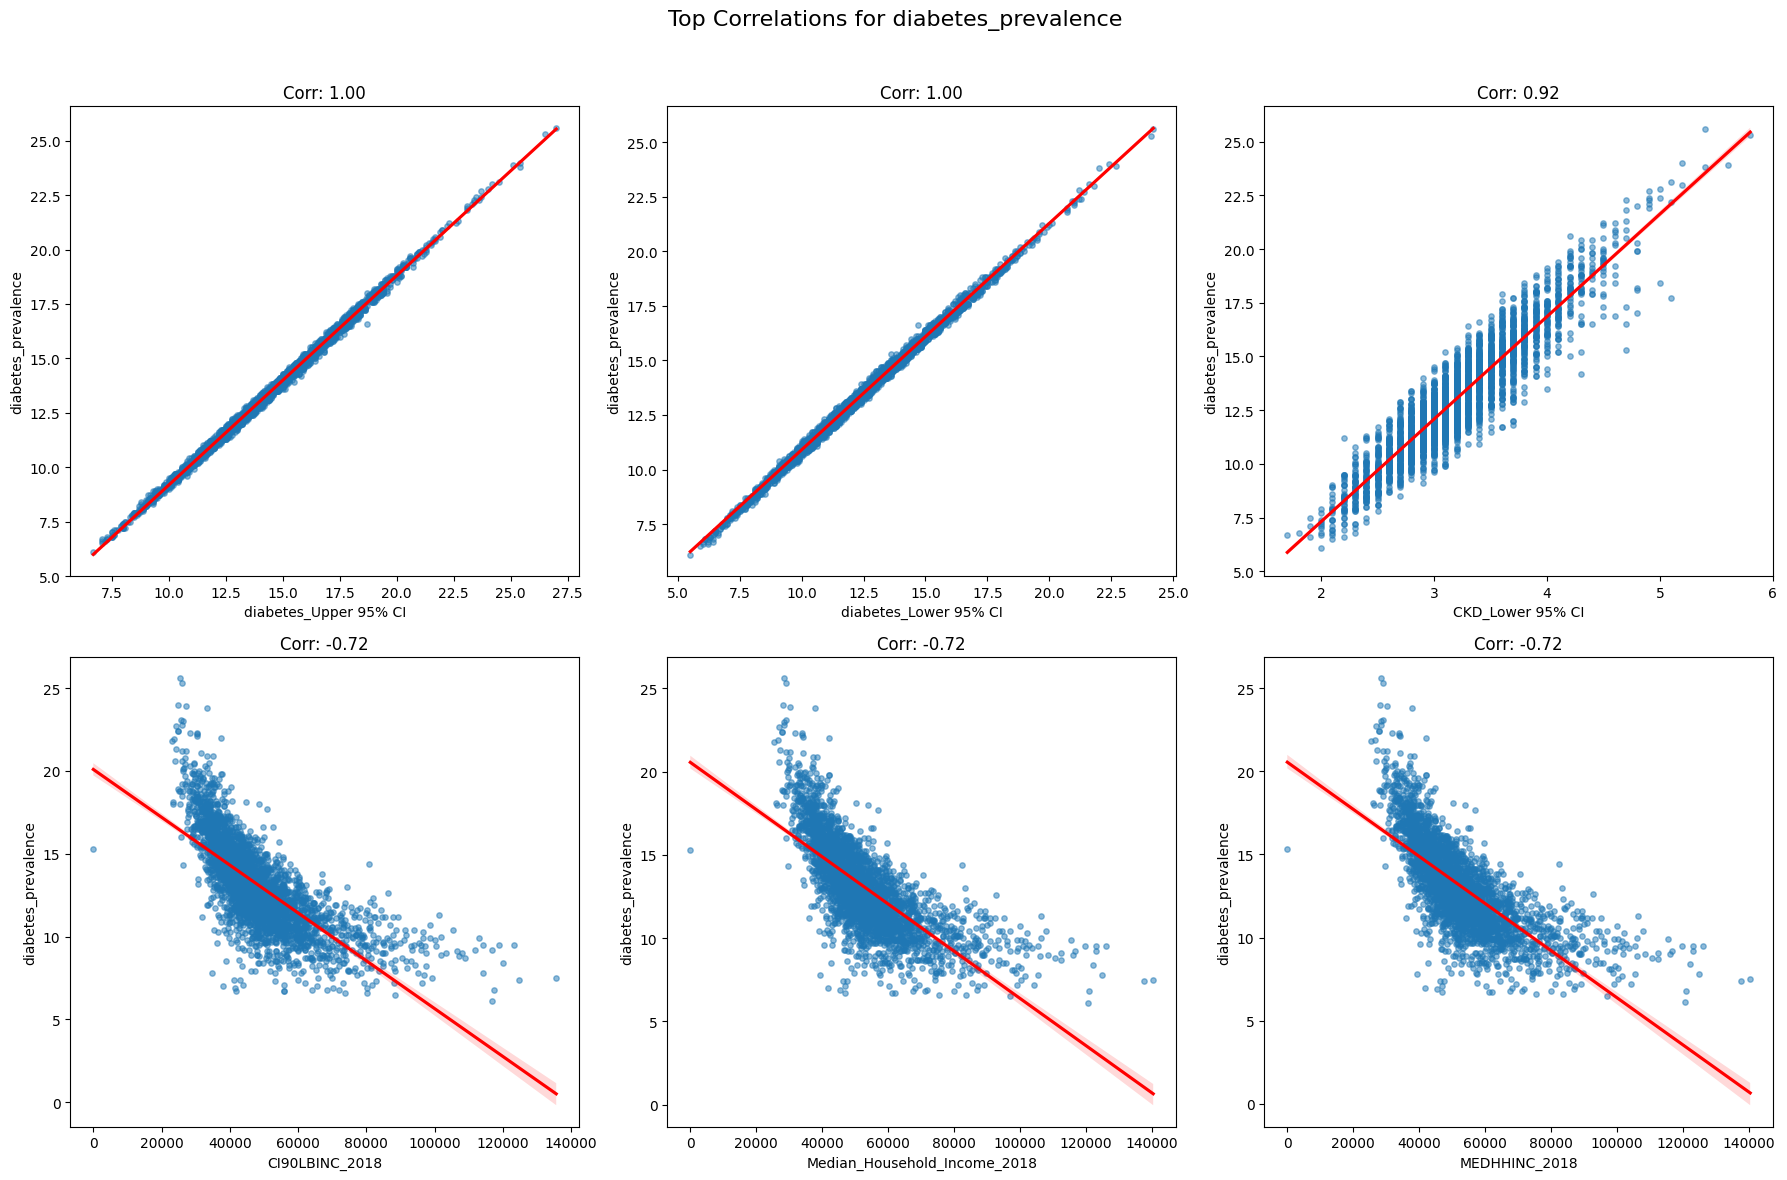


Top correlations for diabetes_prevalence:
++++++++++++++++++++++++++++++++++++++++++++++++++
Strongest positive correlations:
diabetes_Upper 95% CI    0.998409
diabetes_Lower 95% CI    0.998069
CKD_Lower 95% CI         0.924630

Strongest negative correlations:
CI90LBINC_2018                 -0.720820
Median_Household_Income_2018   -0.723316
MEDHHINC_2018                  -0.723316





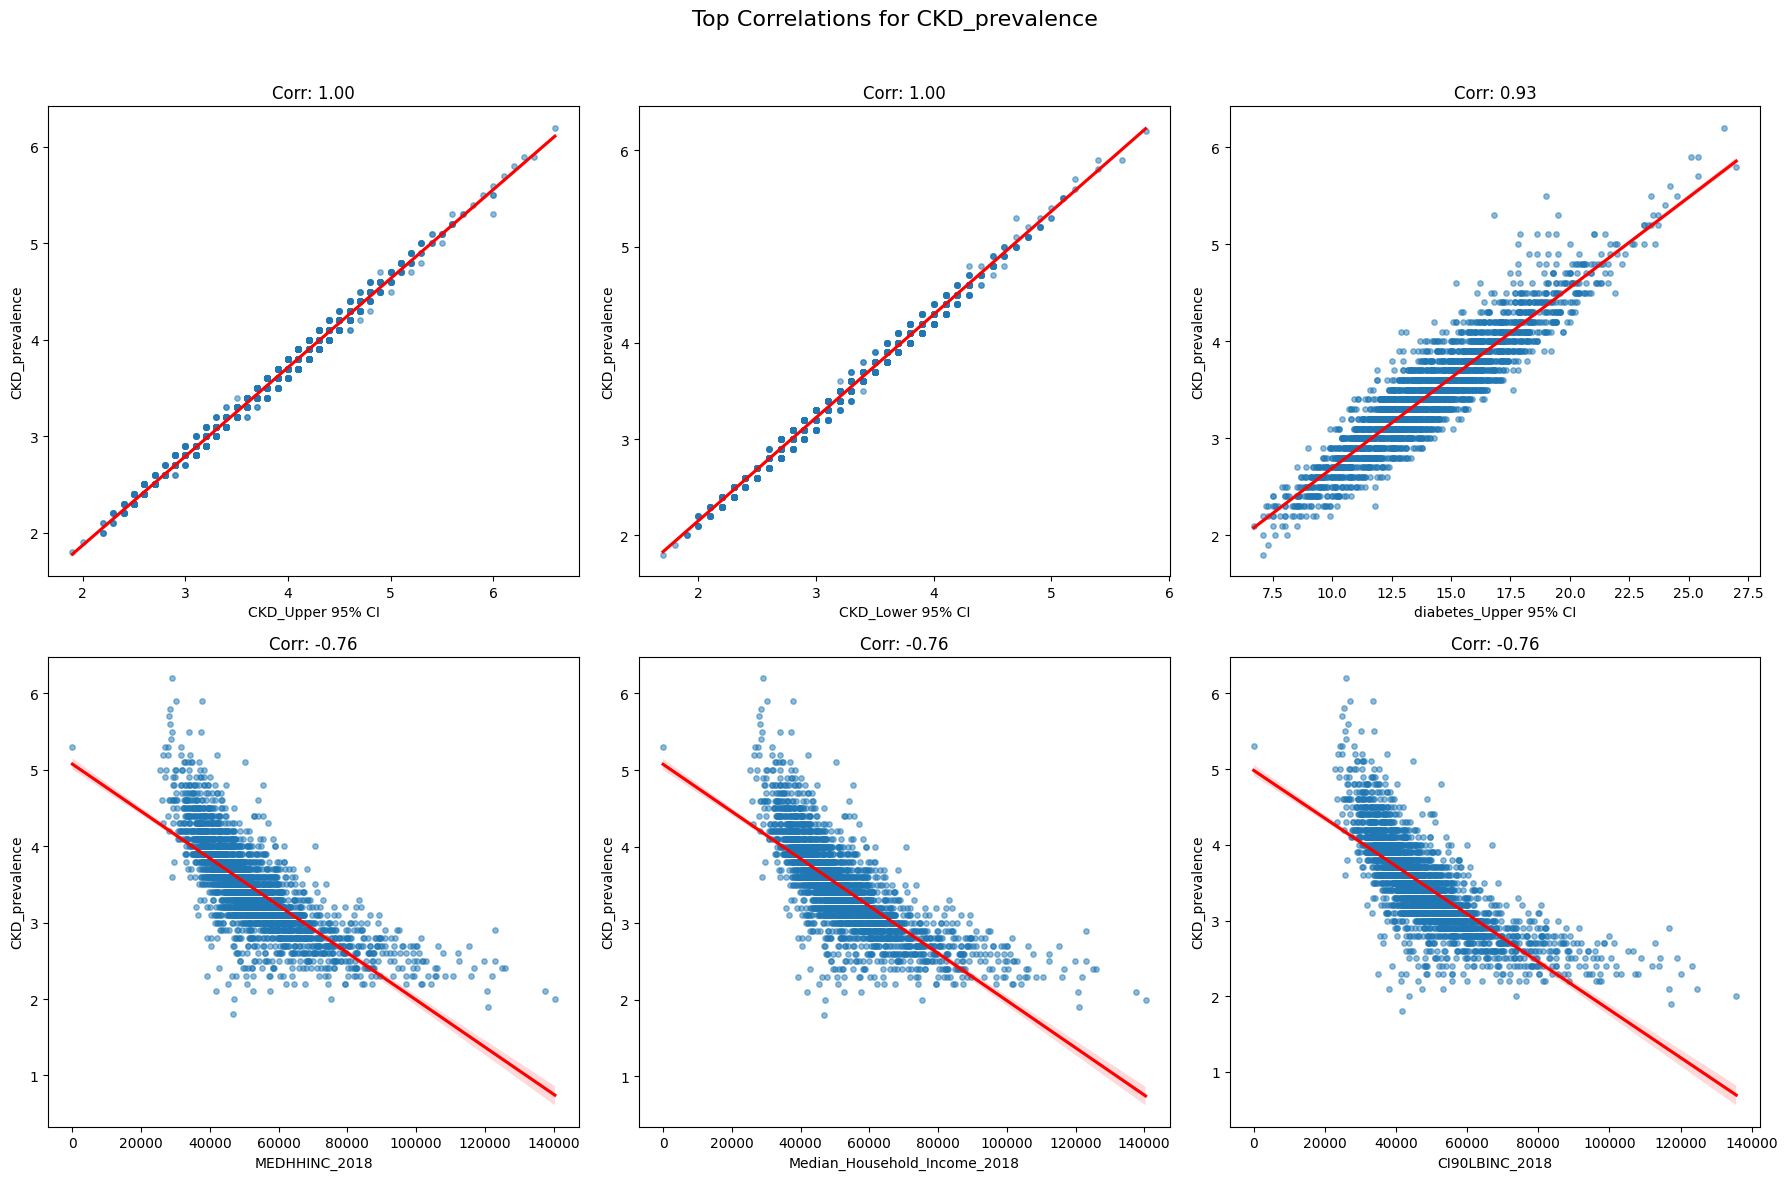


Top correlations for CKD_prevalence:
++++++++++++++++++++++++++++++++++++++++++++++++++
Strongest positive correlations:
CKD_Upper 95% CI         0.995594
CKD_Lower 95% CI         0.995203
diabetes_Upper 95% CI    0.925347

Strongest negative correlations:
MEDHHINC_2018                  -0.755716
Median_Household_Income_2018   -0.755716
CI90LBINC_2018                 -0.756607





In [3]:
# For each health outcome, find top 6 correlated features
for target in health_outcomes:
    # Get correlations for this health outcome
    target_corr = health_socio_corr.loc[target].sort_values(ascending=False)
    
    # Get top 3 positive and top 3 negative correlations
    top_positive = target_corr[:3].index.tolist()
    top_negative = target_corr[-3:].index.tolist()
    top_features = top_positive + top_negative
    
    # Create scatterplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Top Correlations for {target}', fontsize=16)
    
    for i, feature in enumerate(top_features):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        
        sns.regplot(x=data[feature], y=data[target], ax=ax, 
                    scatter_kws={'alpha':0.5, 's':15}, line_kws={'color':'red'})
        ax.set_title(f'Corr: {target_corr[feature]:.2f}')
        ax.set_xlabel(feature)
        ax.set_ylabel(target)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'top_correlations_{target}.png', bbox_inches='tight')
    plt.show()
    
    # Print top correlations in text
    print(f"\nTop correlations for {target}:")
    print("+"*50)
    print("Strongest positive correlations:")
    print(target_corr.head(3).to_string())
    print("\nStrongest negative correlations:")
    print(target_corr.tail(3).to_string())
    print("\n\n")

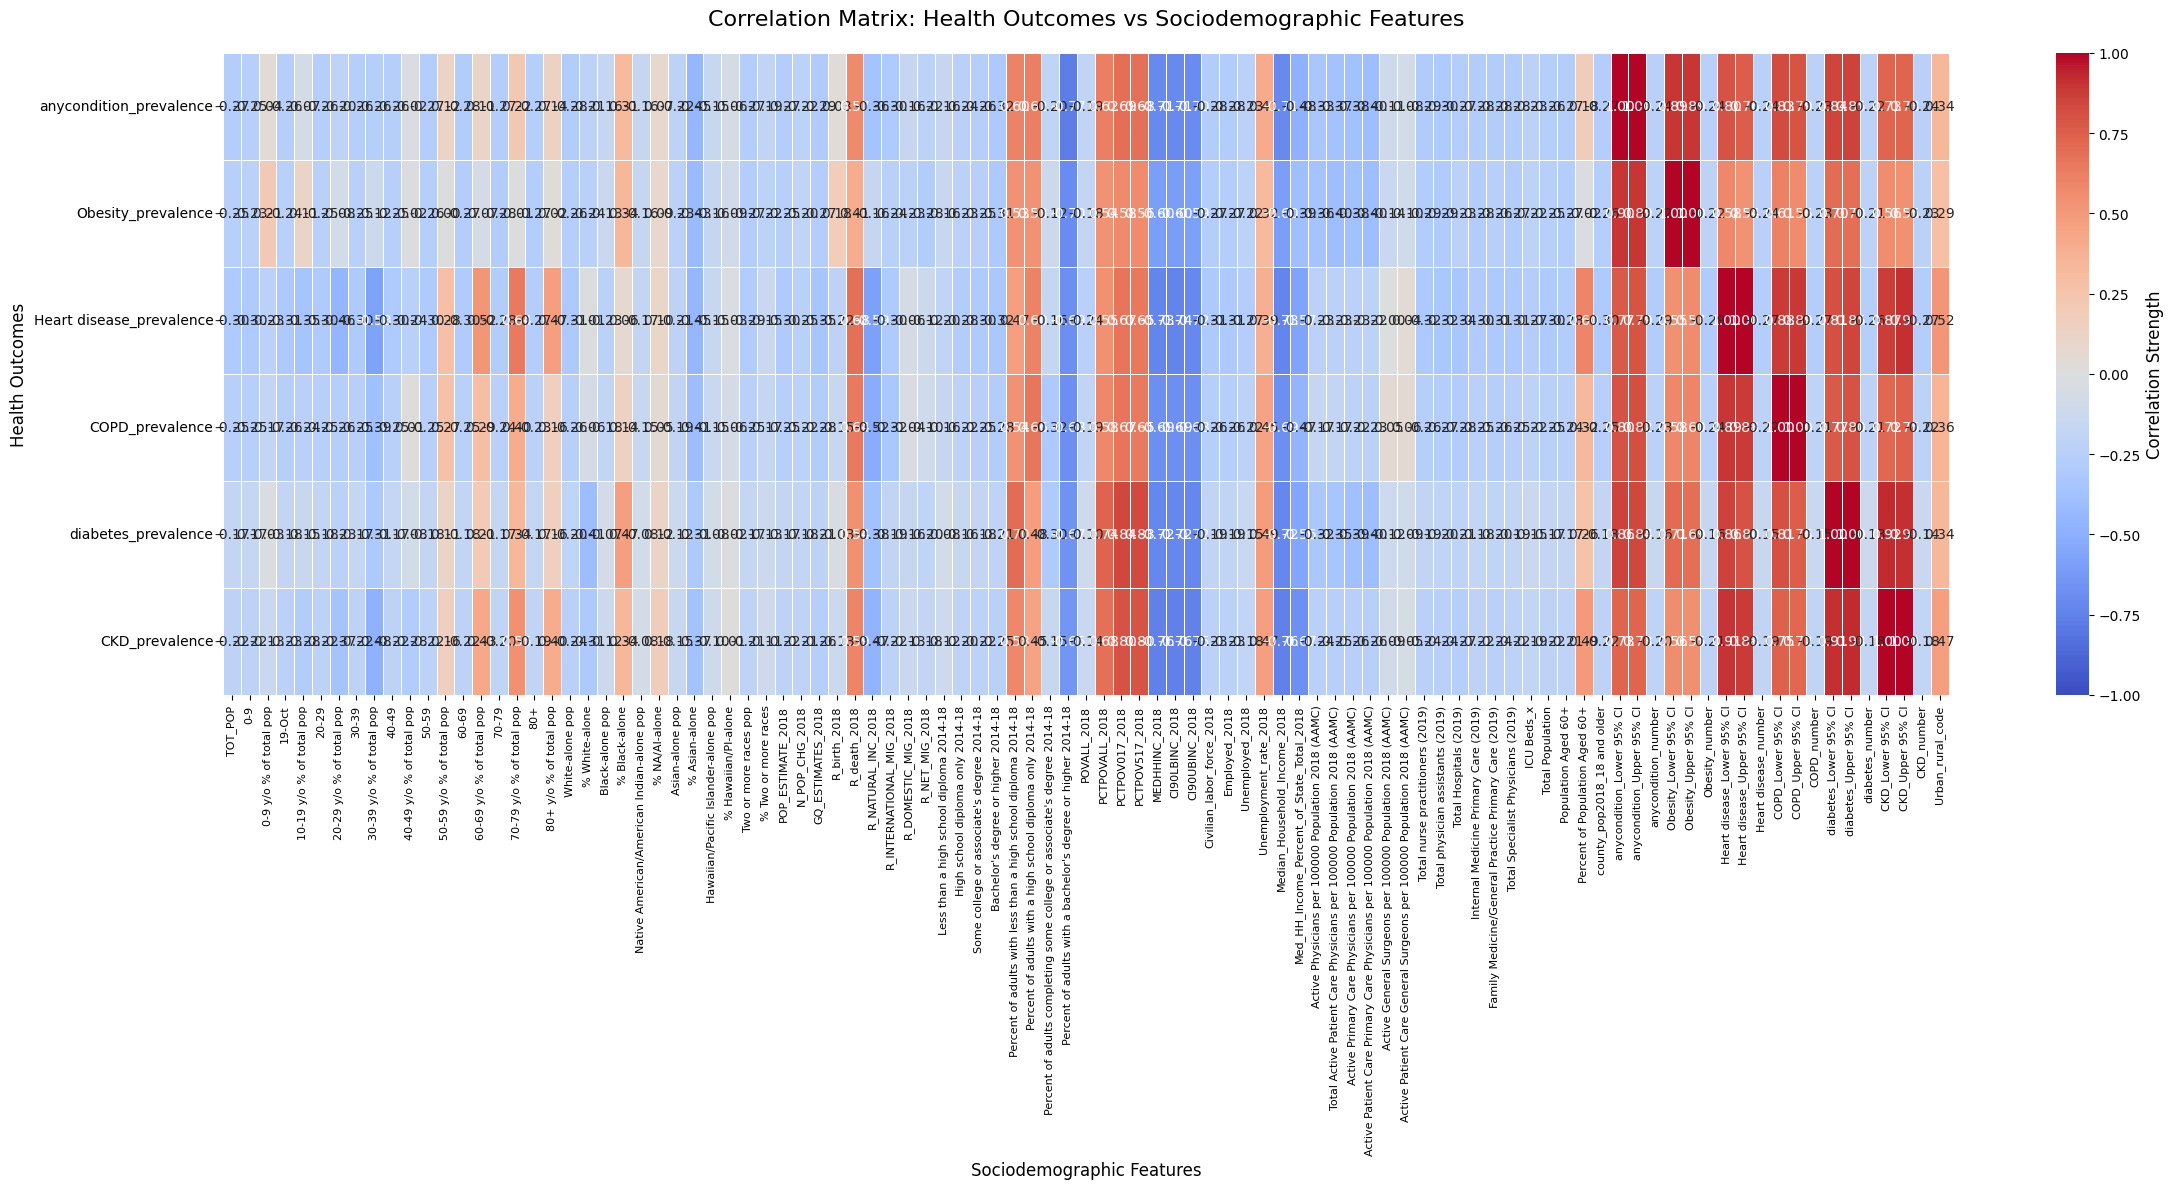

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url)

# Define health outcomes (targets)
health_targets = [
    'anycondition_prevalence',
    'Obesity_prevalence',
    'Heart disease_prevalence',
    'COPD_prevalence',
    'diabetes_prevalence',
    'CKD_prevalence'
]

# Get all sociodemographic features (exclude health outcomes and identifiers)
all_columns = data.columns.tolist()
socio_demo_features = [
    col for col in all_columns 
    if not any(h in col for h in health_targets) 
    and col not in ['fips', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS']
]

# Calculate correlations
corr_matrix = data[socio_demo_features + health_targets].corr()

# Filter to show only health-socio relationships
health_socio_corr = corr_matrix.loc[health_targets, socio_demo_features]

# Create readable heatmap
plt.figure(figsize=(24, 12))

# Create mask to only show values in cells
mask = np.zeros_like(health_socio_corr)
mask[:] = False  # Show all cells

# Plot heatmap with annotations
ax = sns.heatmap(
    health_socio_corr, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    center=0,
    vmin=-1, 
    vmax=1,
    mask=mask,
    annot_kws={"size": 10},
    linewidths=0.5
)

# Improve readability
plt.title('Correlation Matrix: Health Outcomes vs Sociodemographic Features', fontsize=16, pad=20)
plt.xlabel('Sociodemographic Features', fontsize=12)
plt.ylabel('Health Outcomes', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)

# Add colorbar with label
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation Strength', fontsize=12)

plt.tight_layout()
plt.show()